In [1]:
!pip install qiskit qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


In [9]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3
import matplotlib.pyplot as plt

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

In [5]:
print("Quantum Circuit:")
print(qc.draw())

Quantum Circuit:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [6]:
qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)


Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];



In [ ]:
#TASK 1 AND 2 MODIFIED 3 qubits CIRCUIT

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3

qc = QuantumCircuit(3)

qc.h(0)
qc.x(1)
qc.cx(0, 2)
qc.cz(1, 0)
qc.ry(1.5708, 2)
qc.measure_all()

print("Quantum Circuit:")
print(qc.draw())

qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)


Quantum Circuit:
        ┌───┐                    ░ ┌─┐      
   q_0: ┤ H ├──■────────■────────░─┤M├──────
        ├───┤  │        │        ░ └╥┘┌─┐   
   q_1: ┤ X ├──┼────────■────────░──╫─┤M├───
        └───┘┌─┴─┐┌────────────┐ ░  ║ └╥┘┌─┐
   q_2: ─────┤ X ├┤ Ry(1.5708) ├─░──╫──╫─┤M├
             └───┘└────────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════╩══╩══╩═
                                    0  1  2 

Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
x q[1];
cx q[0], q[2];
cz q[1], q[0];
ry(1.5708) q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];



In [ ]:
#TASK3,4,5


Simulation Results:
{'110': 266, '010': 234, '111': 245, '011': 279}


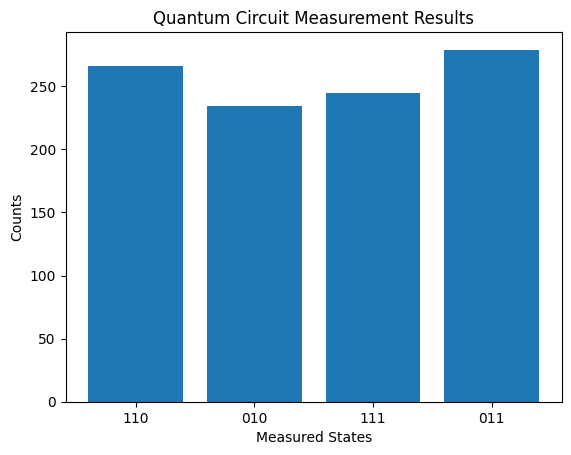

In [10]:
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nSimulation Results:")
print(counts)

plt.bar(counts.keys(), counts.values())
plt.xlabel("Measured States")
plt.ylabel("Counts")
plt.title("Quantum Circuit Measurement Results")
plt.show()